   
   
   <h1><center>Customer Churn Prediction for VeriTel</center></h1>
   <h2><center>Group Number: 10</center></h2>
   
 ### Group Members:
- Anant Krishna
- Bharath Aynampudi
- Chinmay Majee
- Debapratim Ghosh
- Kunal Chandra
- Santosh Srivastava
- Satish Chilloji
- Thej Pammi 

### Contents:
- Project Background
- Data Collection
- Data Explanation
- Project Scope: Model Approach
    - Who are the customers that are going to churn ?
    - Why the customers are going to churn?
- Evaluation metrics
- Tools and Techniques

###  Project Background :
VeriTel is the second largest telecom provider in the world with operations in over 15 countries
directly and in other 21 countries with a partner. The company is a leader in providing telecom
services in both B2B and B2C space. Although the company has been doing well in last 3-4
years, the revenue of the company seems to have been almost plateau like and stagnating. The
CEO hypothesizes that this stagnation is mostly due to a large number of customers churning
out of their subscriptions. Given the fact that the telecommunications industry experiences an
average of 30-35 percent annual churn rate and it costs 5-10 times more to recruit a new
customer than to retain an existing one, customer retention has now become even more
important than customer acquisition.
In order to manage churn reduction, not only do we need to predict which customers are at
high risk of churn, but also we need to know how soon these high-risk customers will
churn. Therefore the company can optimize their marketing intervention resources to prevent
as many customers as possible from churning.
The CEO wants to deploy retention strategies in synchronizing programs and processes to keep
customers longer by providing them with tailored products and services. With retention
strategies in place, the CEO wants to include churn reduction as one of their business goals. 

### Data Collection:
We have collected the data published in [Kaggle](https://www.kaggle.com/abhinav89/telecom-customer).
Kaggle is the world's largest data science community with powerful tools and resources to help you achieve your data science goals and it supports a variety of dataset publication formats in non-proprietary format


### Data Explanation:

In [1]:
import pandas as pd
import numpy as np
telecom=pd.read_csv('Telecom_customer_churn.csv')

The data set has 100,000 rows and 100 Columns

In [2]:
telecom.shape

(100000, 100)

Glimpse of the churn data

In [8]:
pd.options.display.max_columns=1000
telecom.head()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,change_rev,drop_vce_Mean,drop_dat_Mean,blck_vce_Mean,blck_dat_Mean,unan_vce_Mean,unan_dat_Mean,plcd_vce_Mean,plcd_dat_Mean,recv_vce_Mean,recv_sms_Mean,comp_vce_Mean,comp_dat_Mean,custcare_Mean,ccrndmou_Mean,cc_mou_Mean,inonemin_Mean,threeway_Mean,mou_cvce_Mean,mou_cdat_Mean,mou_rvce_Mean,owylis_vce_Mean,mouowylisv_Mean,iwylis_vce_Mean,mouiwylisv_Mean,peak_vce_Mean,peak_dat_Mean,mou_peav_Mean,mou_pead_Mean,opk_vce_Mean,opk_dat_Mean,mou_opkv_Mean,mou_opkd_Mean,drop_blk_Mean,attempt_Mean,complete_Mean,callfwdv_Mean,callwait_Mean,churn,months,uniqsubs,actvsubs,new_cell,crclscod,asl_flag,totcalls,totmou,totrev,adjrev,adjmou,adjqty,avgrev,avgmou,avgqty,avg3mou,avg3qty,avg3rev,avg6mou,avg6qty,avg6rev,prizm_social_one,area,dualband,refurb_new,hnd_price,phones,models,hnd_webcap,truck,rv,ownrent,lor,dwlltype,marital,adults,infobase,income,numbcars,HHstatin,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,-18.9975,0.666667,0.0,0.666667,0.0,6.333333,0.0,52.333333,0.0,42.333333,0.0,45.000000,0.0,0.000000,0.000000,0.000000,18.000000,0.000000,90.643333,0.0,97.176667,0.000000,0.000000,0.000000,0.000000,58.000000,0.0,132.600000,0.0,24.000000,0.0,55.220000,0.0,1.333333,52.333333,45.000000,0.0,0.333333,1,61,2,1,U,A,N,1652,4228.00000,1504.62,1453.44,4085.00,1602,29.66,83.37,32.69,272,116,30,322.0,136.0,38.0,S,NORTHWEST/ROCKY MOUNTAIN AREA,Y,N,149.98999,2.0,2.0,WCMB,0.0,0.0,O,15.0,S,S,1.0,M,4.0,3.0,C,A,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,50.9875,8.333333,0.0,1.000000,0.0,61.333333,0.0,263.333333,0.0,69.000000,0.0,193.333333,0.0,1.666667,6.333333,5.463333,53.000000,0.333333,189.396667,0.0,55.280000,46.333333,24.216667,6.333333,3.696667,83.666667,0.0,75.333333,0.0,157.000000,0.0,169.343333,0.0,9.333333,263.333333,193.333333,0.0,5.666667,0,56,1,1,N,EA,N,14654,26400.00000,2851.68,2833.88,26367.00,14624,51.53,479.40,265.89,305,158,40,477.0,275.0,48.0,U,CHICAGO AREA,N,N,NaN,7.0,6.0,WC,1.0,1.0,NaN,1.0,S,S,1.0,M,5.0,1.0,C,A,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,0.0000,0.333333,0.0,0.000000,0.0,2.666667,0.0,9.000000,0.0,0.333333,0.0,6.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.000000,5.426667,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,5.193333,0.0,1.000000,0.0,0.233333,0.0,0.333333,9.000000,6.000000,0.0,0.000000,1,58,1,1,Y,C,N,7903,24385.05333,2155.91,1934.47,24303.05,7888,34.54,433.98,140.86,12,7,17,11.0,6.0,17.0,S,GREAT LAKES AREA,N,N,29.98999,2.0,1.0,NaN,0.0,0.0,O,7.0,S,M,2.0,M,5.0,2.0,C,A,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,0.0000,0.000000,0.0,0.000000,0.0,0.000000,0.0,3.666667,0.0,1.333333,0.0,3.666667,0.0,0.000000,0.000000,0.000000,1.333333,0.000000,8.410000,0.0,0.413333,0.333333,0.256667,0.000000,0.000000,1.333333,0.0,3.380000,0.0,3.666667,0.0,5.450000,0.0,0.000000,3.666667,3.666667,0.0,0.000000,0,60,1,1,Y,B,N,1502,3065.00000,2000.90,1941.81,3035.00,1479,40.45,63.23,30.81,8,3,38,50.0,25.0,40.0,T,CHICAGO AREA,N,N,29.98999,1.0,1.0,NaN,0.0,0.0,NaN,6.0,M,M,4.0,M,6.0,1.0,C,D,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,0.0000,9.666667,0.0,0.666667,0.0,77.000000,0.0,222.333333,0.0,94.666667,0.0,137.000000,0.0,8.666667,15.000000,11.076667,66.000000,0.000000,285.233333,0.0,106.330000,14.666667,10.816667,0.666667,0.366667,97.333333,0.0,173.476667,0.0,90.333333,0.0,218.086667,0.0,10.333333,222.333333,137.000000,0.0,0.000000,0,57,1,1,Y,A,N,4485,14028.00000,2181.12,2166.48,13965.00,4452,38.69,249.38,79.50,558,191,55,586.0,196.0,80.0,U,NEW ENGLAND AREA,Y,N,149.98999,6.0,4.0,WCMB,0.0,0.0,R,5.0,M,S,1.0,M,6.0,1.0,C,O,0.0,I,U,U,U,U,U,Y,434.0,1000005


Number of each data type of column

In [10]:
telecom.dtypes.value_counts()

float64    69
object     21
int64      10
dtype: int64

Target column churn distribution

0    50438
1    49562
Name: churn, dtype: int64

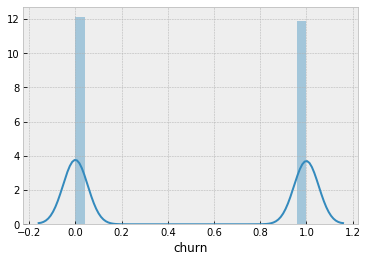

In [7]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
plt.style.use('bmh')
sns.distplot(telecom['churn'])
telecom['churn'].value_counts()

### Model Approach:

We will be following the tradition ML modeling approach to find the **who are the customers that are going to churn**? The data is divided into 70-30 split and the model is trained on the 70% of the data and predicts on 30% of the data. 

As we have the limited data option we will performing set of feature engineering inorder to boost the accuracy.

Feature Engineering on numerical features:
- Scaling
- Transformations
- Outlier cliping
- Feature Interactions
- Approximation of Addition and Multiplication.

Feature Engineering on categorical features:
- Convert to numeric
    - Label encoding
    - Frequency encoding
    - One-Hot encoding
    - Weight of evidence
- Interaction features: min,max,avg group by

The workflow of the model moves from left to right. We will be trainig the data on variety of models performing the hyperparameter tuning. Before the ensemble we will be doing the 5-Fold cross validation to overcome the issue like overfitting and underfitting the model and provide the predictions.


![title](model_approach.png)

#### Explainable Machine Learning

In the Churn model once we have know who all the customer are going to Churn the next question that the end user look for **Why this customers are going to churn?** over the period of time this will be the important to know root cause for the churn.

In machine learning complex model has big issue with transparency, we don’t have any strong prove why model give that prediction and which feature are impacting the model prediction, which features are strongly contributing, and which are negative contribution for model prediction. By feature importance graph we can see which features importance by passing complete training and test dataset, but for single row of features or for any given instance it is very difficult to understand why and how model predict output.

We will be looking on the following 3 Explainable technique.
- Lime
- Shap
- eli5

#### Lime 

LIME is a local surrogated model which normally use Linear regression or decision tree model to explain the prediction at local boundary. In advance You need to select the K number which is kernel weight and number of features the lower K value easier it is to interpret the model, and the Higher K value produces models with higher fidelity. LIME currently uses an exponential smoothing kernel to define the neighbourhood. A smoothing kernel is a function that takes two data instances and returns a proximity measure. The kernel width determines how large the neighbourhood is: A small kernel width means that an instance must be very close to influence the local model, a larger kernel width means that instances that are farther away also influence the model.

![title](lime.png)


#### Shap 

SHAP goal is to explain the prediction of an given instance x by computing the contribution of each feature to the prediction. The feature values of a data instance act as players in a coalitional game theory. SHAP prediction output is a fair distribution of all the feature Shapley values. Shapely value is actually distribution, it’s a average of model contribution made by each player(features) over all permutation of player(features).The baseline for Shapley values is the average of all predictions. In the plot, each Shapley value is an arrow that pushes to increase (positive value) or decrease (negative value) the prediction.

![title](shap.png)


### eli5

ELI5 help to debug machine learning classifier and explain their top prediction via a easy to understand and good visualize way. However, it doesn’t support true model-agnostic interpretations and support for models are mostly limited to tree-based and other parametric\linear models. When you want to predict ELI5 does this by showing weights for each feature depicting how influential it might have been in contributing to the final prediction decision across all trees. ELI5 provides an independent implementation of this algorithm for XGBoost and most scikit-learn tree ensembles which is definitely on the path towards model-agnostic interpretation but not purely model-agnostic like LIME.

![title](eli5.png)


### Evaluation metrics:

Different performance metrics are used to evaluate different Machine Learning Algorithms. For now, we will be focusing on the ones used for Classification problems. We can use the following classification performance metrics:
- AUC(Area under Curve)
- Accuracy
- Precision and recall

#### AUC-ROC
The AUC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.


![title](auc.png)

#### Accuracy 
Accuracy in classification problems is the number of correct predictions made by the model over all kinds predictions made.

![title](cm.png)

Accuracy = $\frac{TP+TN}{TP+FP+FN+TN}$

#### Precision

Precision is a measure that tells us what proportion of customers that we predicted as churn are actually had churn.

Precision = $\frac{TP}{TP+FP}$

#### Recall

Recall is a measure that tells us what proportion of customers that actually had churn and how much the algorithm is predicted as churn.

Recall = $\frac{TP}{TP+FN}$

### Tools and Techniques:
- R or Python : Data mining, Model buliding
- GitHub : Versioning and Sharing
- Tableau : Data Visualization and Deployment